## Fake data to visualize MWEM's histograms
MWEM works by first creating a uniformly distributed histogram out of real data. It then iteratively updates this histogram with noisy samples from the real data. In other words, using the multiplicative weights mechanism, MWEM updates the histograms "weights" via the DP exponential mechanism (for querying the original data).

Here, we create a heatmap from the histograms. We visualize the histogram made from the real data, and the differentially private histogram. Brighter values correspond to more higher probability bins in each histogram.

In [30]:
import os
import pandas as pd
import numpy as np
import random

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from snsynth import Synthesizer
from snsynth.transform import TableTransformer, BinTransformer


In [31]:
def plot_histo(title,histo):
    if isinstance(histo, pd.DataFrame):
        grouped = df.groupby(['fake_column_1', 'fake_column_2']).size().reset_index(name='counts')
        histo = np.zeros((df['fake_column_1'].max() + 1, df['fake_column_2'].max() + 1))
        for _, row in grouped.iterrows():
            histo[int(row['fake_column_1']), int(row['fake_column_2'])] = row['counts']

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    ax.set_title(title)
    plt.imshow(histo)
    ax.set_aspect('equal')
    cax = fig.add_axes([0.1, 1.0, 1., 0.1])
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.set_frame_on(False)
    plt.colorbar(orientation='horizontal')
    plt.show()


Spent 1.0 epsilon on preprocessor, leaving 3.0 for training


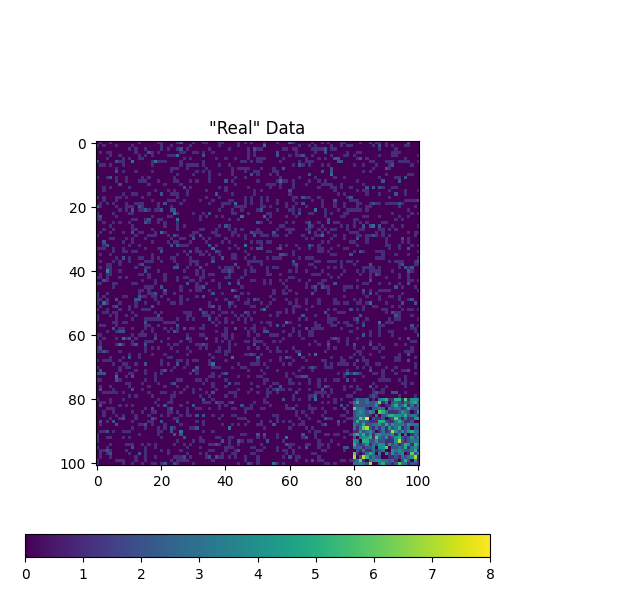

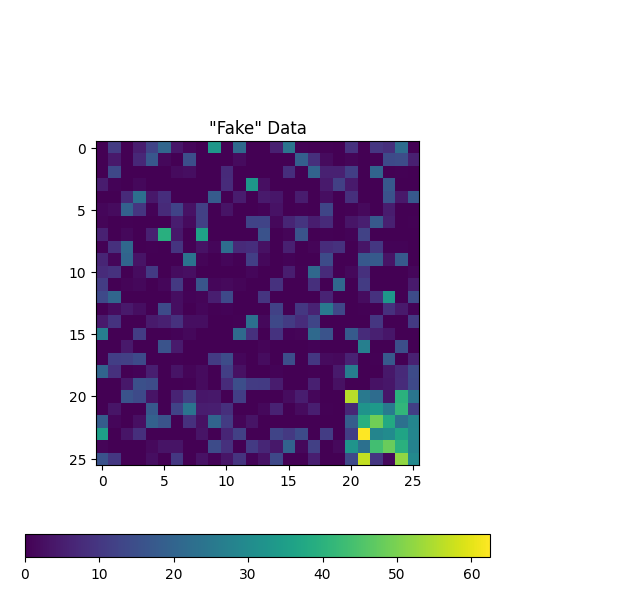

In [32]:
# Make ourselves some fake data, with a "hot-spot" in the distribution
# in the bottom right corner

df = pd.DataFrame({'fake_column_1': [random.randint(0,100) for i in range(3000)] + [random.randint(80,100) for i in range(1000)],
                   'fake_column_2': [random.randint(0,100) for i in range(3000)] + [random.randint(80,100) for i in range(1000)],})

transformer = TableTransformer([
    BinTransformer(bins=33),
    BinTransformer(bins=33)
])
synth = Synthesizer.create("mwem", epsilon=4.0)
synth.fit(df, transformer=transformer, preprocessor_eps=1.0)

    
plot_histo('"Real" Data', df)
plot_histo('"Fake" Data', synth.synthetic_histograms[0][0])

## Effect of Bin Count
Here we can visualize the effect of specifying a max_bin_count. In the original data, we have 33x33 bins. If we reduce that to 10x10, we see that we still do a pretty good job at capturing the overall distribution.

Spent 1.0 epsilon on preprocessor, leaving 3.0 for training


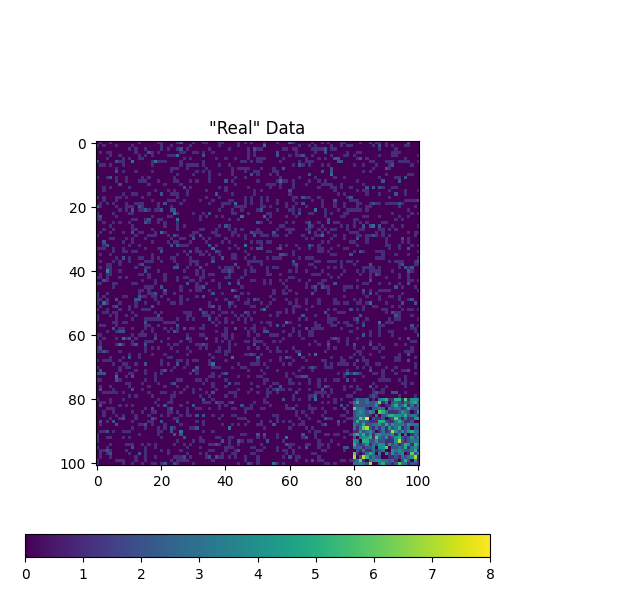

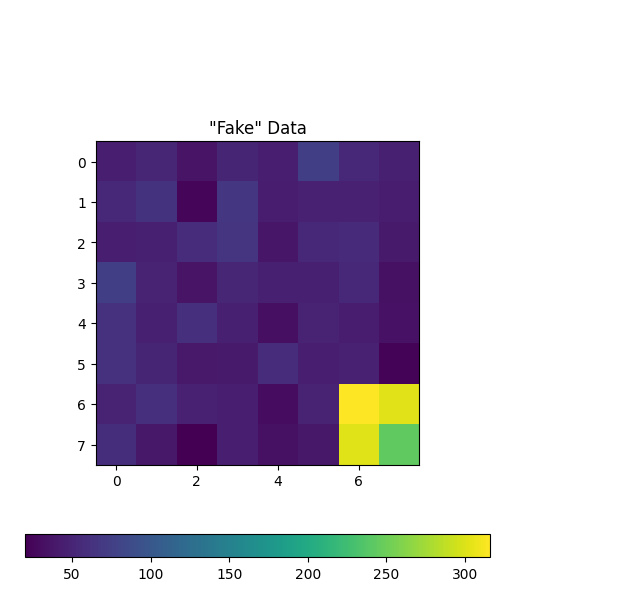

In [33]:

transformer = TableTransformer([
    BinTransformer(),
    BinTransformer()
])
synth = Synthesizer.create("mwem", epsilon=4.0)
synth.fit(df, transformer=transformer, preprocessor_eps=1.0)

plot_histo('"Real" Data', df)
plot_histo('"Fake" Data', synth.synthetic_histograms[0][0])